In [51]:
# Import required packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

## 1. Load the datasets

For the project, we provide a training set with 50000 images in the directory `../data/images/` with:
- noisy labels for all images provided in `../data/noisy_label.csv`;
- clean labels for the first 10000 images provided in `../data/clean_labels.csv`.

In [46]:
!unzip -q test_data.zip

replace __MACOSX/test_data/._test_images? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
!unzip -q data.zip

In [3]:
# [DO NOT MODIFY THIS CELL]

# load the images
n_img = 50000
n_noisy = 40000
n_clean_noisy = n_img - n_noisy
imgs = np.empty((n_img,32,32,3))
for i in range(n_img):
    img_fn = f'../content/data/images/{i+1:05d}.png'
    imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)
# load the labels
clean_labels = np.genfromtxt('../content/data/clean_labels.csv', delimiter=',', dtype="int8")
noisy_labels = np.genfromtxt('../content/data/noisy_labels.csv', delimiter=',', dtype="int8")

For illustration, we present a small subset (of size 8) of the images with their clean and noisy labels in `clean_noisy_trainset`. You are encouraged to explore more characteristics of the label noises on the whole dataset.

Clean labels:
 frog truck truck  deer   car   car  bird horse
Noisy labels:
  cat   dog truck  frog   dog  ship  bird  deer


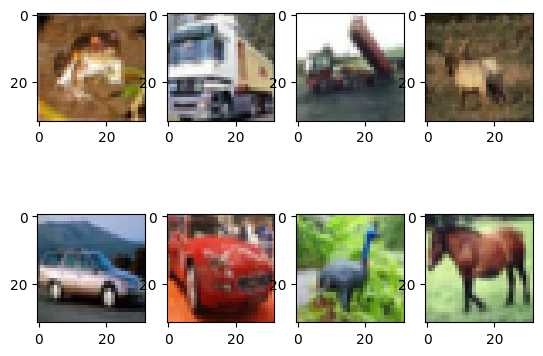

In [4]:
# [DO NOT MODIFY THIS CELL]

fig = plt.figure()

ax1 = fig.add_subplot(2,4,1)
ax1.imshow(imgs[0]/255)
ax2 = fig.add_subplot(2,4,2)
ax2.imshow(imgs[1]/255)
ax3 = fig.add_subplot(2,4,3)
ax3.imshow(imgs[2]/255)
ax4 = fig.add_subplot(2,4,4)
ax4.imshow(imgs[3]/255)
ax1 = fig.add_subplot(2,4,5)
ax1.imshow(imgs[4]/255)
ax2 = fig.add_subplot(2,4,6)
ax2.imshow(imgs[5]/255)
ax3 = fig.add_subplot(2,4,7)
ax3.imshow(imgs[6]/255)
ax4 = fig.add_subplot(2,4,8)
ax4.imshow(imgs[7]/255)

# The class-label correspondence
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# print clean labels
print('Clean labels:')
print(' '.join('%5s' % classes[clean_labels[j]] for j in range(8)))
# print noisy labels
print('Noisy labels:')
print(' '.join('%5s' % classes[noisy_labels[j]] for j in range(8)))


## 2. The predictive model

We consider a baseline model directly on the noisy dataset without any label corrections. RGB histogram features are extracted to fit a logistic regression model.

### 2.1. Baseline Model

Baseline Model: 12 s

In [5]:
# [DO NOT MODIFY THIS CELL]
# RGB histogram dataset construction
no_bins = 6
bins = np.linspace(0,255,no_bins) # the range of the rgb histogram
target_vec = np.empty(n_img)
feature_mtx = np.empty((n_img,3*(len(bins)-1)))
i = 0
for i in range(n_img):
    # The target vector consists of noisy labels
    target_vec[i] = noisy_labels[i]

    # Use the numbers of pixels in each bin for all three channels as the features
    feature1 = np.histogram(imgs[i][:,:,0],bins=bins)[0]
    feature2 = np.histogram(imgs[i][:,:,1],bins=bins)[0]
    feature3 = np.histogram(imgs[i][:,:,2],bins=bins)[0]

    # Concatenate three features
    feature_mtx[i,] = np.concatenate((feature1, feature2, feature3), axis=None)
    i += 1

In [6]:
print(imgs[0].shape)

(32, 32, 3)


In [7]:
# [DO NOT MODIFY THIS CELL]
# Train a logistic regression model
clf = LogisticRegression(random_state=0).fit(feature_mtx, target_vec)

Model I: 7 min

In [8]:
## model I (7 min)


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping



model_train_data=range(10000,50000)
model1 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
model1.fit(imgs[model_train_data]/255, noisy_labels[model_train_data], epochs=40, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1000/1000 [==============================] - 43s 41ms/step - loss: 2.2816 - accuracy: 0.1372 - val_loss: 2.2426 - val_accuracy: 0.1894
Epoch 2/40
1000/1000 [==============================] - 44s 44ms/step - loss: 2.2467 - accuracy: 0.1842 - val_loss: 2.2414 - val_accuracy: 0.1762
Epoch 3/40
1000/1000 [==============================] - 40s 40ms/step - loss: 2.2272 - accuracy: 0.2044 - val_loss: 2.2306 - val_accuracy: 0.1975
Epoch 4/40
1000/1000 [==============================] - 41s 41ms/step - loss: 2.2087 - accuracy: 0.2189 - val_loss: 2.2167 - val_accuracy: 0.2159
Epoch 5/40
1000/1000 [==============================] - 41s 41ms/step - loss: 2.1907 - accuracy: 0.2313 - val_loss: 2.2124 - val_accuracy: 0.2192
Epoch 6/40
1000/1000 [==============================] - 41s 41ms/step - loss: 2.1726 - accuracy: 0.2390 - val_loss: 2.2224 - val_accuracy: 0.2192
Epoch 7/40
1000/1000 [==============================] - 41s 41ms/step - loss: 2.1553 - accuracy: 0.2485 - val_loss: 2.2213 - val_accura

Model II: 4 min + 9 min = 13 min

In [9]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

image_input_shape = (32, 32, 3)  # Define your image dimensions
prior_label_input_shape = (1,)  # Assuming prior label is a single integer

# Define input layers
image_input = Input(shape=image_input_shape, name='image_input')
prior_label_input = Input(shape=prior_label_input_shape, name='prior_label_input')

# CNN layers for image processing
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(image_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Concatenate image features and prior label
concatenated_features = concatenate([flatten, prior_label_input])

# Fully connected layers for classification
dense1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated_features)
dropout1 = Dropout(0.5)(dense1)  # Adding dropout regularization
output = Dense(10, activation='softmax')(dropout1)  # Assuming num_classes is the number of output classes

# Define the model
label_correction_model = Model(inputs=[image_input, prior_label_input], outputs=output)

# Compile the model
label_correction_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
label_correction_model.fit([imgs[:10000]/255, noisy_labels[:10000]], clean_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
corrected_labels = label_correction_model.predict([imgs, noisy_labels])
corrected_labels = np.argmax(corrected_labels, axis=1)

Epoch 1/50
250/250 [==============================] - 12s 43ms/step - loss: 2.3382 - accuracy: 0.2550 - val_loss: 1.8666 - val_accuracy: 0.3570
Epoch 2/50
250/250 [==============================] - 11s 42ms/step - loss: 1.8512 - accuracy: 0.3694 - val_loss: 1.7346 - val_accuracy: 0.4315
Epoch 3/50
250/250 [==============================] - 11s 42ms/step - loss: 1.7577 - accuracy: 0.4005 - val_loss: 1.6545 - val_accuracy: 0.4625
Epoch 4/50
250/250 [==============================] - 11s 44ms/step - loss: 1.7034 - accuracy: 0.4376 - val_loss: 1.5969 - val_accuracy: 0.4815
Epoch 5/50
250/250 [==============================] - 9s 37ms/step - loss: 1.6620 - accuracy: 0.4540 - val_loss: 1.6052 - val_accuracy: 0.4945
Epoch 6/50
250/250 [==============================] - 11s 42ms/step - loss: 1.6374 - accuracy: 0.4697 - val_loss: 1.5530 - val_accuracy: 0.5120
Epoch 7/50
250/250 [==============================] - 11s 43ms/step - loss: 1.6031 - accuracy: 0.4913 - val_loss: 1.5158 - val_accuracy: 

Noisy labels:
  car horse   cat  frog plane   cat   cat  bird
corrected labels:
plane  horse  truck  ship  car  truck  horse  truck  

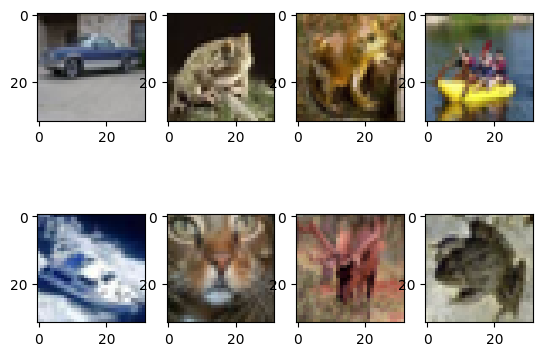

In [10]:
fig = plt.figure()

ax1 = fig.add_subplot(2,4,1)
ax1.imshow(imgs[10000]/255)
ax2 = fig.add_subplot(2,4,2)
ax2.imshow(imgs[10001]/255)
ax3 = fig.add_subplot(2,4,3)
ax3.imshow(imgs[10002]/255)
ax4 = fig.add_subplot(2,4,4)
ax4.imshow(imgs[10003]/255)
ax1 = fig.add_subplot(2,4,5)
ax1.imshow(imgs[10004]/255)
ax2 = fig.add_subplot(2,4,6)
ax2.imshow(imgs[10005]/255)
ax3 = fig.add_subplot(2,4,7)
ax3.imshow(imgs[10006]/255)
ax4 = fig.add_subplot(2,4,8)
ax4.imshow(imgs[10007]/255)

# The class-label correspondence
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# print clean labels
#print('Clean labels:')
#print(' '.join('%5s' % classes[clean_labels[j]] for j in range(8)))
# print noisy labels
print('Noisy labels:')
print(' '.join('%5s' % classes[noisy_labels[j]] for j in range(10000,10008)))
print('corrected labels:')
for j in range(10000,10008):
    print(classes[corrected_labels[j]], end="  ")

In [11]:
model1.save("../output/model_I.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model II: 4 min + 9 min = 13 min

In [12]:
## model II


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

model_train_data=range(10000,50000)
#clean_corrected_data=np.concatenate((clean_labels, corrected_labels[10000:]), axis=0)
#train_labels=clean_corrected_data[model_train_data]

model2 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
model2.fit(imgs[model_train_data]/255, corrected_labels[model_train_data], epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
1000/1000 [==============================] - 44s 43ms/step - loss: 1.0938 - accuracy: 0.6007 - val_loss: 0.7636 - val_accuracy: 0.7186
Epoch 2/50
1000/1000 [==============================] - 42s 42ms/step - loss: 0.6890 - accuracy: 0.7402 - val_loss: 0.5699 - val_accuracy: 0.7851
Epoch 3/50
1000/1000 [==============================] - 41s 41ms/step - loss: 0.6015 - accuracy: 0.7719 - val_loss: 0.5204 - val_accuracy: 0.7997
Epoch 4/50
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5459 - accuracy: 0.7910 - val_loss: 0.5073 - val_accuracy: 0.8075
Epoch 5/50
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5161 - accuracy: 0.8031 - val_loss: 0.5190 - val_accuracy: 0.7925
Epoch 6/50
1000/1000 [==============================] - 42s 42ms/step - loss: 0.4838 - accuracy: 0.8143 - val_loss: 0.4938 - val_accuracy: 0.8094
Epoch 7/50
1000/1000 [==============================] - 41s 41ms/step - loss: 0.4738 - accuracy: 0.8188 - val_loss: 0.4909 -

In [13]:
model2.save("../output/model_II.h5")

For the convenience of evaluation, we write the following function `predictive_model` that does the label prediction. **For your predictive model, feel free to modify the function, but make sure the function takes an RGB image of numpy.array format with dimension $32\times32\times3$  as input, and returns one single label as output.**

In [14]:
# [DO NOT MODIFY THIS CELL]
def baseline_model(image):
    '''
    This is the baseline predictive model that takes in the image and returns a label prediction
    '''
    feature1 = np.histogram(image[:,:,0],bins=bins)[0]
    feature2 = np.histogram(image[:,:,1],bins=bins)[0]
    feature3 = np.histogram(image[:,:,2],bins=bins)[0]
    feature = np.concatenate((feature1, feature2, feature3), axis=None).reshape(1,-1)
    return clf.predict(feature)

### 2.2. Model I

In [15]:
# [BUILD A MORE SOPHISTICATED PREDICTIVE MODEL]

# write your code here...

def model_I(image):
    '''
    This function should takes in the image of dimension 32*32*3 as input and returns a label prediction
    '''
    # write your code here...
    image=np.expand_dims(image, axis=0)
    prediction=model1.predict(image/255, verbose=0)
    return np.argmax(prediction)

### 2.3. Model II

In [16]:
# [ADD WEAKLY SUPERVISED LEARNING FEATURE TO MODEL I]

# write your code here...

def model_II(image):
    '''
    This function should takes in the image of dimension 32*32*3 as input and returns a label prediction
    '''
    # write your code here...
    image=np.expand_dims(image, axis=0)
    prediction=model2.predict(image/255, verbose=0)
    return np.argmax(prediction)

## 3. Evaluation

For assessment, we will evaluate your final model on a hidden test dataset with clean labels by the `evaluation` function defined as follows. Although you will not have the access to the test set, the function would be useful for the model developments. For example, you can split the small training set, using one portion for weakly supervised learning and the other for validation purpose.

In [71]:
# [DO NOT MODIFY THIS CELL]
def evaluation(model, test_labels, test_imgs):
    y_true = test_labels
    y_pred = []
    for image in test_imgs:
        y_pred.append(model(image))
    print(classification_report(y_true, y_pred))

In [73]:
# [DO NOT MODIFY THIS CELL]

## Performence for baseline model -- storage, memory and time

import time
import psutil
import cv2


# Record the start time and start memory for baseline model
start_time = time.time()
start_mem = psutil.Process().memory_info().rss

n_test = 10000
test_labels = np.genfromtxt('../content/test_data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../content/test_data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

baseline_predict=[]
for test_img in test_imgs:
  baseline_predict.append(int(baseline_model(test_img)[0]))
baseline_predict

end_time = time.time()
end_mem = psutil.Process().memory_info().rss

# Calculate the elapsed time and the used memory
elapsed_time = end_time - start_time
used_mem = end_mem - start_mem

# Print the elapsed time and used memory
print("Time taken:", elapsed_time, "seconds")
print("Function used {:.2f} MB of memory.".format((used_mem) / (1024 * 1024)))
print("Total memory available: {:.2f} GB".format(psutil.virtual_memory().total / (1024 * 1024 * 1024)))
print("CPU usage: {:.2f}%".format(psutil.cpu_percent()))

Time taken: 4.496915578842163 seconds
Function used 0.20 MB of memory.
Total memory available: 12.67 GB
CPU usage: 31.80%


In [74]:
## Performence for model I -- storage, memory and time

import time
import psutil

# Record the start time and start memory for model I
start_time = time.time()
start_mem = psutil.Process().memory_info().rss

n_test = 10000
test_labels = np.genfromtxt('../content/test_data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../content/test_data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)


model_I_predict=np.argmax(model1.predict(test_imgs), axis=1)

end_time = time.time()
end_mem = psutil.Process().memory_info().rss

# Calculate the elapsed time and the used memory
elapsed_time = end_time - start_time
used_mem = end_mem - start_mem

# Print the elapsed time and used memory
print("Time taken:", elapsed_time, "seconds")
print("Function used {:.2f} MB of memory.".format((used_mem) / (1024 * 1024)))
print("Total memory available: {:.2f} GB".format(psutil.virtual_memory().total / (1024 * 1024 * 1024)))
print("CPU usage: {:.2f}%".format(psutil.cpu_percent()))

313/313 [==============================] - 3s 10ms/step
Time taken: 6.602477312088013 seconds
Function used 352.01 MB of memory.
Total memory available: 12.67 GB
CPU usage: 50.60%


In [75]:
# [DO NOT MODIFY THIS CELL]
# This is the code for evaluating the prediction performance on a testset
# You will get an error if running this cell, as you do not have the testset
# Nonetheless, you can create your own validation set to run the evlauation


## Performence for model II -- storage, memory and time

import time
import psutil

# Record the start time and start memory for model II
start_time = time.time()
start_mem = psutil.Process().memory_info().rss

n_test = 10000
test_labels = np.genfromtxt('../content/test_data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../content/test_data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)


model_II_predict=np.argmax(model2.predict(test_imgs), axis=1)

end_time = time.time()
end_mem = psutil.Process().memory_info().rss

# Calculate the elapsed time and the used memory
elapsed_time = end_time - start_time
used_mem = end_mem - start_mem

# Print the elapsed time and used memory
print("Time taken:", elapsed_time, "seconds")
print("Function used {:.2f} MB of memory.".format((used_mem) / (1024 * 1024)))
print("Total memory available: {:.2f} GB".format(psutil.virtual_memory().total / (1024 * 1024 * 1024)))
print("CPU usage: {:.2f}%".format(psutil.cpu_percent()))

313/313 [==============================] - 3s 11ms/step
Time taken: 6.624996662139893 seconds
Function used 0.00 MB of memory.
Total memory available: 12.67 GB
CPU usage: 43.40%


In [81]:
## Performence for baseline model -- prediction accuracy

n_test = 10000
test_labels = np.genfromtxt('../content/test_data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../content/test_data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

evaluation(baseline_model, test_labels[:n_test], test_imgs)

              precision    recall  f1-score   support

           0       0.33      0.46      0.38      1000
           1       0.21      0.31      0.25      1000
           2       0.20      0.04      0.07      1000
           3       0.19      0.12      0.14      1000
           4       0.24      0.48      0.32      1000
           5       0.20      0.11      0.14      1000
           6       0.24      0.34      0.28      1000
           7       0.31      0.04      0.08      1000
           8       0.27      0.43      0.33      1000
           9       0.20      0.12      0.15      1000

    accuracy                           0.24     10000
   macro avg       0.24      0.24      0.21     10000
weighted avg       0.24      0.24      0.21     10000



The average precision of baseline model is 0.24 .

In [82]:
## Performence for model I -- prediction accuracy

n_test = 10000
test_labels = np.genfromtxt('../content/test_data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../content/test_data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

evaluation(model_I, test_labels[:n_test], test_imgs)

              precision    recall  f1-score   support

           0       0.58      0.39      0.47      1000
           1       0.50      0.75      0.60      1000
           2       0.33      0.42      0.37      1000
           3       0.39      0.27      0.32      1000
           4       0.44      0.35      0.39      1000
           5       0.38      0.54      0.45      1000
           6       0.76      0.39      0.51      1000
           7       0.58      0.54      0.56      1000
           8       0.53      0.65      0.58      1000
           9       0.52      0.50      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



The average precision of model I is 0.49 .  (13 min)

In [83]:
## Performence for model II -- prediction accuracy

n_test = 10000
test_labels = np.genfromtxt('../content/test_data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../content/test_data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

evaluation(model_II, test_labels[:n_test], test_imgs)

              precision    recall  f1-score   support

           0       0.26      0.81      0.40      1000
           1       0.37      0.86      0.52      1000
           2       0.45      0.08      0.13      1000
           3       0.36      0.03      0.06      1000
           4       0.78      0.03      0.06      1000
           5       0.48      0.45      0.46      1000
           6       0.84      0.03      0.05      1000
           7       0.53      0.43      0.48      1000
           8       0.49      0.38      0.43      1000
           9       0.28      0.49      0.35      1000

    accuracy                           0.36     10000
   macro avg       0.48      0.36      0.29     10000
weighted avg       0.48      0.36      0.29     10000



The average precision of model II is 0.57 . (14 min)

_

The overall accuracy is $0.24$, which is better than random guess (which should have a accuracy around $0.10$). For the project, you should try to improve the performance by the following strategies:

- Consider a better choice of model architectures, hyperparameters, or training scheme for the predictive model;
- Use both `clean_noisy_trainset` and `noisy_trainset` for model training via **weakly supervised learning** methods. One possible solution is to train a "label-correction" model using the former, correct the labels in the latter, and train the final predictive model using the corrected dataset.
- Apply techniques such as $k$-fold cross validation to avoid overfitting;
- Any other reasonable strategies.

 _

label_prediction.csv (on the test set):

It should contain 4 columns with the following column names: "Index", "Baseline", "Model I", and "Model II".

In [85]:
# (38 min)

n_test = 10000
test_labels = np.genfromtxt('../content/test_data/test_labels.csv', delimiter=',', dtype="int8")
test_imgs = np.empty((n_test,32,32,3))
for i in range(n_test):
    img_fn = f'../content/test_data/test_images/test{i+1:05d}.png'
    test_imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)

test_images_normalized = test_imgs / 255.0

import pandas as pd
Index = []
baseline_pred = []
model_I_pred = []
model_II_pred =[]
#test to change to 100

for i in range(10000):
    img = test_imgs[i]
    Index.append(i+1)
    baseline_pred.append(baseline_model(img))
    model_I_pred.append(model_I(img))
    model_II_pred.append(model_II(img))

label_prediction_df = pd.DataFrame({
    "baseline": baseline_pred,
    "model_I": model_I_pred,
    "model_II": model_II_pred
})
label_prediction_df.to_csv("../output/label_prediction.csv", index=True, index_label="index")

In [ ]:
model_II_predict

array([5, 8, 9, 0, 1, 1, 0, 7, 0, 9, 7, 7, 9, 0, 9, 8, 9, 0, 9, 1, 0, 1,
       8, 1, 9, 9, 9, 9, 7, 0, 8, 9, 1, 5, 0, 9, 0, 7, 0, 0, 9, 7, 0, 7,
       0, 1, 1, 0, 0, 0, 8, 9, 0, 1, 2, 0, 1, 1, 0, 9, 1, 1, 8, 1, 1, 1,
       7, 9, 7, 0, 0, 1, 1, 7, 0, 1, 9, 0, 1, 0, 0, 1, 0, 9, 1, 5, 7, 7,
       9, 1, 0, 0, 8, 0, 1, 6, 1, 1, 1, 8, 0, 5, 9, 0, 1, 1, 8, 5, 2, 0,
       1, 0, 1, 9, 9, 0, 8, 1, 9, 1, 0, 0, 9, 7, 1, 9, 0, 9, 9, 0, 0, 0,
       8, 7, 1, 0, 1, 0, 0, 8, 9, 8, 2, 1, 0, 0, 1, 8, 5, 0, 1, 0, 7, 0,
       9, 1, 7, 5, 7, 9, 1, 8, 7, 7, 1, 0, 1, 5, 1, 9, 1, 0, 7, 0, 9, 1,
       1, 5, 7, 7, 0, 7, 5, 1, 9, 8, 9, 6, 9, 0, 8, 0, 8, 0, 0, 5, 0, 3,
       5, 0, 0, 1, 9, 0, 9, 9, 8, 8, 9, 8, 1, 7, 1, 0, 9, 1, 0, 9, 7, 9,
       0, 8, 8, 0, 1, 9, 1, 8, 1, 5, 1, 0, 6, 0, 9, 9, 8, 7, 1, 5, 0, 8,
       2, 0, 8, 1, 0, 0, 9, 1, 1, 9, 8, 0, 0, 1, 7, 1, 5, 0, 9, 1, 1, 0,
       0, 9, 0, 9, 0, 9, 9, 7, 0, 1, 9, 1, 0, 0, 9, 7, 8, 0, 1, 0, 0, 7,
       6, 9, 0, 7, 8, 8, 5, 0, 7, 9, 1, 9, 0, 0, 0,